In [28]:
import pandas as pd
import csv
import re
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [29]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
df = pd.read_csv('tweets.csv')

In [31]:
df['subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['polarity'] = df['Tweet'].apply(getPolarity)

df

Unnamed: 0                 Time           User           Location  \
0             0  2022-04-27 05:22:43        lamek94          Windhoek    
1             1  2022-04-27 03:00:06        sinut69            Namibia   
2             2  2022-04-26 21:47:25  __evuleMoses_           oshakati   
3             3  2022-04-26 20:47:28  journeyman_94            Namibia   
4             4  2022-04-26 20:46:52   _EierKlitser            Namibia   
..          ...                  ...            ...                ...   
143         143  2022-04-19 09:42:44   SilasNdakolo            Namibia   
144         144  2022-04-19 09:31:50        MevrouS            Namibia   
145         145  2022-04-19 09:27:59     EagleFMNam            Namibia   
146         146  2022-04-19 09:17:45    AsserNtinda  Windhoek, Namibia   
147         147  2022-04-19 09:14:58      Daaalllas            Namibia   

                                                 Tweet  subjectivity  polarity  
0    must blame mr ekandjo ! everything belong swapo .      0.000000  0.000000  
1    call national flag say belong swapo ? contradi...      0.000000  0.000000  
2    immanuel benefits swapo wants stay power till ...      0.500000 -0.150000  
3                     swanu flag inspired swapo flag ?      0.000000  0.000000  
4    swapo wants rule enrich pockets like pm. kak b...      0.100000  0.200000  
..                                                 ...           ...       ...  
143  blame public relations team swapo , tell good ...      0.333333  0.350000  
144  mekondjo cases , complaints even taken serious...      0.316667 -0.308333  
145  swapo ' oshana regional coordinator , samuel n...      0.283333  0.025000  
146  cde , ask pres question prepare swapo elective...      0.416667 -0.018750  
147  vulnerable people getting vouchers use agra in...      0.500000 -0.500000  

[148 rows x 7 columns]

In [ ]:
def get_sentiment_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'    

In [ ]:
df['TBsentiment'] = df['polarity'].apply(get_sentiment_label)
df

Unnamed: 0                 Time           User           Location  \
0             0  2022-04-27 05:22:43        lamek94          Windhoek    
1             1  2022-04-27 03:00:06        sinut69            Namibia   
2             2  2022-04-26 21:47:25  __evuleMoses_           oshakati   
3             3  2022-04-26 20:47:28  journeyman_94            Namibia   
4             4  2022-04-26 20:46:52   _EierKlitser            Namibia   
..          ...                  ...            ...                ...   
143         143  2022-04-19 09:42:44   SilasNdakolo            Namibia   
144         144  2022-04-19 09:31:50        MevrouS            Namibia   
145         145  2022-04-19 09:27:59     EagleFMNam            Namibia   
146         146  2022-04-19 09:17:45    AsserNtinda  Windhoek, Namibia   
147         147  2022-04-19 09:14:58      Daaalllas            Namibia   

                                                 Tweet  subjectivity  \
0    must blame mr ekandjo ! everything belong swapo .      0.000000   
1    call national flag say belong swapo ? contradi...      0.000000   
2    immanuel benefits swapo wants stay power till ...      0.500000   
3                     swanu flag inspired swapo flag ?      0.000000   
4    swapo wants rule enrich pockets like pm. kak b...      0.100000   
..                                                 ...           ...   
143  blame public relations team swapo , tell good ...      0.333333   
144  mekondjo cases , complaints even taken serious...      0.316667   
145  swapo ' oshana regional coordinator , samuel n...      0.283333   
146  cde , ask pres question prepare swapo elective...      0.416667   
147  vulnerable people getting vouchers use agra in...      0.500000   

     polarity TBsentiment  vader_compound VADERsentiment  
0    0.000000     Neutral         -0.4003       Negative  
1    0.000000     Neutral         -0.2500       Negative  
2   -0.150000    Negative          0.1531       Positive  
3    0.000000     Neutral          0.4939       Positive  
4    0.200000    Positive          0.1027       Positive  
..        ...         ...             ...            ...  
143  0.350000    Positive          0.1280       Positive  
144 -0.308333    Negative         -0.8779       Negative  
145  0.025000    Positive          0.1779       Positive  
146 -0.018750    Negative          0.5848       Positive  
147 -0.500000    Negative         -0.1431       Negative  

[148 rows x 10 columns]

In [34]:
df['TBsentiment'].value_counts()

Positive    52
Neutral     50
Negative    46
Name: TBsentiment, dtype: int64

In [35]:
sorted_df = df.sort_values(by=['polarity'], ascending=False)

In [36]:
init_notebook_mode(connected=True)

In [37]:
fig = px.scatter(df, x="polarity", y="subjectivity", hover_data=['Tweet'],
                 title="TextBlob Sentiment Analysis")

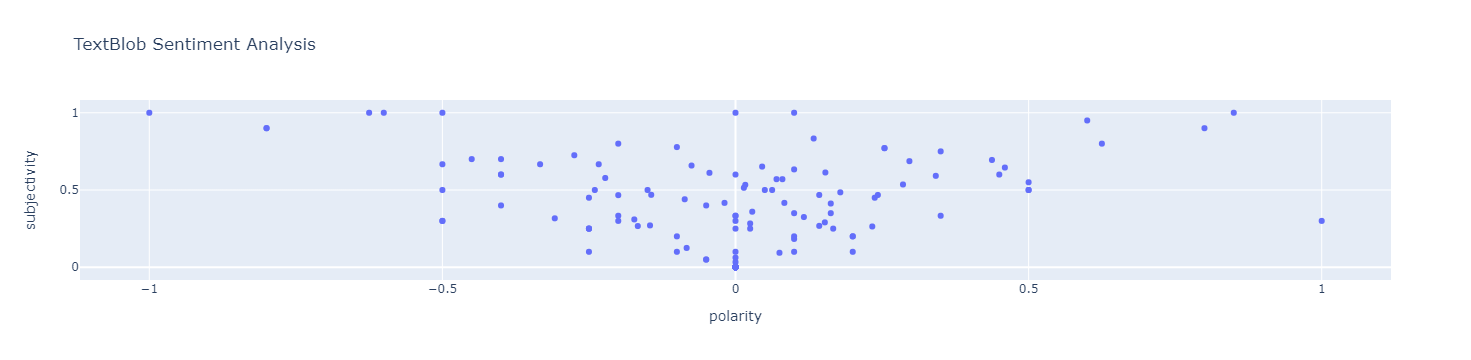

In [38]:
fig.show()

## Vader Lib

In [40]:
analyser = SentimentIntensityAnalyzer()

In [43]:
def get_vaderCompoundPolarity(text):
    return analyser.polarity_scores(text)['compound']
    
df['vader_compound'] = df['Tweet'].apply(get_vaderCompoundPolarity)
df

Unnamed: 0                 Time           User           Location  \
0             0  2022-04-27 05:22:43        lamek94          Windhoek    
1             1  2022-04-27 03:00:06        sinut69            Namibia   
2             2  2022-04-26 21:47:25  __evuleMoses_           oshakati   
3             3  2022-04-26 20:47:28  journeyman_94            Namibia   
4             4  2022-04-26 20:46:52   _EierKlitser            Namibia   
..          ...                  ...            ...                ...   
143         143  2022-04-19 09:42:44   SilasNdakolo            Namibia   
144         144  2022-04-19 09:31:50        MevrouS            Namibia   
145         145  2022-04-19 09:27:59     EagleFMNam            Namibia   
146         146  2022-04-19 09:17:45    AsserNtinda  Windhoek, Namibia   
147         147  2022-04-19 09:14:58      Daaalllas            Namibia   

                                                 Tweet  subjectivity  \
0    must blame mr ekandjo ! everything belong swapo .      0.000000   
1    call national flag say belong swapo ? contradi...      0.000000   
2    immanuel benefits swapo wants stay power till ...      0.500000   
3                     swanu flag inspired swapo flag ?      0.000000   
4    swapo wants rule enrich pockets like pm. kak b...      0.100000   
..                                                 ...           ...   
143  blame public relations team swapo , tell good ...      0.333333   
144  mekondjo cases , complaints even taken serious...      0.316667   
145  swapo ' oshana regional coordinator , samuel n...      0.283333   
146  cde , ask pres question prepare swapo elective...      0.416667   
147  vulnerable people getting vouchers use agra in...      0.500000   

     polarity TBsentiment  vader_compound  
0    0.000000     Neutral         -0.4003  
1    0.000000     Neutral         -0.2500  
2   -0.150000    Negative          0.1531  
3    0.000000     Neutral          0.4939  
4    0.200000    Positive          0.1027  
..        ...         ...             ...  
143  0.350000    Positive          0.1280  
144 -0.308333    Negative         -0.8779  
145  0.025000    Positive          0.1779  
146 -0.018750    Negative          0.5848  
147 -0.500000    Negative         -0.1431  

[148 rows x 9 columns]

In [44]:
df['VADERsentiment'] = df['vader_compound'].apply(get_sentiment_label)
df

Unnamed: 0                 Time           User           Location  \
0             0  2022-04-27 05:22:43        lamek94          Windhoek    
1             1  2022-04-27 03:00:06        sinut69            Namibia   
2             2  2022-04-26 21:47:25  __evuleMoses_           oshakati   
3             3  2022-04-26 20:47:28  journeyman_94            Namibia   
4             4  2022-04-26 20:46:52   _EierKlitser            Namibia   
..          ...                  ...            ...                ...   
143         143  2022-04-19 09:42:44   SilasNdakolo            Namibia   
144         144  2022-04-19 09:31:50        MevrouS            Namibia   
145         145  2022-04-19 09:27:59     EagleFMNam            Namibia   
146         146  2022-04-19 09:17:45    AsserNtinda  Windhoek, Namibia   
147         147  2022-04-19 09:14:58      Daaalllas            Namibia   

                                                 Tweet  subjectivity  \
0    must blame mr ekandjo ! everything belong swapo .      0.000000   
1    call national flag say belong swapo ? contradi...      0.000000   
2    immanuel benefits swapo wants stay power till ...      0.500000   
3                     swanu flag inspired swapo flag ?      0.000000   
4    swapo wants rule enrich pockets like pm. kak b...      0.100000   
..                                                 ...           ...   
143  blame public relations team swapo , tell good ...      0.333333   
144  mekondjo cases , complaints even taken serious...      0.316667   
145  swapo ' oshana regional coordinator , samuel n...      0.283333   
146  cde , ask pres question prepare swapo elective...      0.416667   
147  vulnerable people getting vouchers use agra in...      0.500000   

     polarity TBsentiment  vader_compound VADERsentiment  
0    0.000000     Neutral         -0.4003       Negative  
1    0.000000     Neutral         -0.2500       Negative  
2   -0.150000    Negative          0.1531       Positive  
3    0.000000     Neutral          0.4939       Positive  
4    0.200000    Positive          0.1027       Positive  
..        ...         ...             ...            ...  
143  0.350000    Positive          0.1280       Positive  
144 -0.308333    Negative         -0.8779       Negative  
145  0.025000    Positive          0.1779       Positive  
146 -0.018750    Negative          0.5848       Positive  
147 -0.500000    Negative         -0.1431       Negative  

[148 rows x 10 columns]

In [45]:
df['VADERsentiment'].value_counts()

Positive    79
Negative    44
Neutral     25
Name: VADERsentiment, dtype: int64

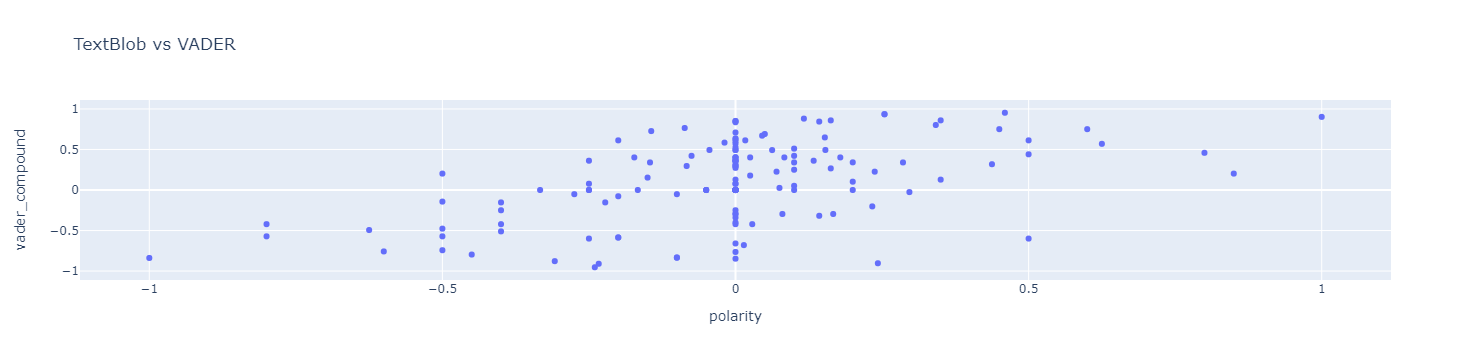

In [46]:
fig = px.scatter(df, x="polarity", y="vader_compound", hover_data=['Tweet'],
                 title="TextBlob vs VADER")
fig.show()

In [62]:
clean_df =df[['Tweet','VADERsentiment']]

## Sentiments Extracted

In [75]:
clean_df.to_csv('labelled_tweets_clean.csv')